In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

Using TensorFlow backend.


In [2]:
#bajo y proceso los datos
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target #aniado precio a la ultima columna del pd
data = bos.to_numpy() #convierto pd a numpy array

In [3]:
#hago un shuffle para tomar aleatoriamente los datos de training y test
np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)
#separo entre testing y training
#hay 506 datos en total (x 14 columnas)
x_train = data[127:,:13]
y_train = data[127:,13]
x_test = data[:127,:13]
y_test = data[:127,13]
#normalizacion que me piden en el enunciado
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0)
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
#defino otras constantes de la red para resolver el problema
n_dim = x_train.shape[1]
n_capa1 = 100
n_capa2 = 10
n_capa3 = 1
rg = 1e-2
lr = 1e-3
epocas = 200

In [4]:
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1, activation='relu', use_bias=True, 
                           kernel_regularizer=keras.regularizers.l2(rg))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='relu',use_bias=True,
                           kernel_regularizer=keras.regularizers.l2(rg))(l1)
l3 = keras.layers.Dense(units=n_capa3,activation='linear',use_bias=True, kernel_regularizer=keras.regularizers.l2(rg))(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.MSE, metrics=['MSE'])
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=64, verbose=2)

Train on 379 samples, validate on 127 samples
Epoch 1/200
 - 0s - loss: 513.9485 - MSE: 513.5103 - val_loss: 362.5325 - val_MSE: 362.0741
Epoch 2/200
 - 0s - loss: 267.6634 - MSE: 267.1771 - val_loss: 86.8963 - val_MSE: 86.3604
Epoch 3/200
 - 0s - loss: 68.4391 - MSE: 67.8834 - val_loss: 42.9800 - val_MSE: 42.4088
Epoch 4/200
 - 0s - loss: 44.2929 - MSE: 43.7195 - val_loss: 34.2073 - val_MSE: 33.6295
Epoch 5/200
 - 0s - loss: 36.6093 - MSE: 36.0303 - val_loss: 29.5212 - val_MSE: 28.9423
Epoch 6/200
 - 0s - loss: 32.0878 - MSE: 31.5056 - val_loss: 27.0151 - val_MSE: 26.4359
Epoch 7/200
 - 0s - loss: 29.3843 - MSE: 28.8030 - val_loss: 25.5937 - val_MSE: 25.0092
Epoch 8/200
 - 0s - loss: 26.9997 - MSE: 26.4147 - val_loss: 24.1917 - val_MSE: 23.6068
Epoch 9/200
 - 0s - loss: 25.1414 - MSE: 24.5551 - val_loss: 22.9993 - val_MSE: 22.4140
Epoch 10/200
 - 0s - loss: 23.5487 - MSE: 22.9629 - val_loss: 22.9006 - val_MSE: 22.3113
Epoch 11/200
 - 0s - loss: 22.3767 - MSE: 21.7884 - val_loss: 21.96

Epoch 94/200
 - 0s - loss: 9.2351 - MSE: 8.5985 - val_loss: 13.5349 - val_MSE: 12.9013
Epoch 95/200
 - 0s - loss: 9.3646 - MSE: 8.7294 - val_loss: 13.5636 - val_MSE: 12.9292
Epoch 96/200
 - 0s - loss: 9.2560 - MSE: 8.6209 - val_loss: 13.8962 - val_MSE: 13.2605
Epoch 97/200
 - 0s - loss: 9.1538 - MSE: 8.5173 - val_loss: 13.4189 - val_MSE: 12.7841
Epoch 98/200
 - 0s - loss: 9.1596 - MSE: 8.5244 - val_loss: 14.1493 - val_MSE: 13.5126
Epoch 99/200
 - 0s - loss: 9.1186 - MSE: 8.4823 - val_loss: 14.2865 - val_MSE: 13.6484
Epoch 100/200
 - 0s - loss: 9.0757 - MSE: 8.4385 - val_loss: 13.7649 - val_MSE: 13.1282
Epoch 101/200
 - 0s - loss: 9.0755 - MSE: 8.4384 - val_loss: 13.7069 - val_MSE: 13.0700
Epoch 102/200
 - 0s - loss: 9.0313 - MSE: 8.3948 - val_loss: 14.5455 - val_MSE: 13.9062
Epoch 103/200
 - 0s - loss: 8.9793 - MSE: 8.3412 - val_loss: 14.1826 - val_MSE: 13.5443
Epoch 104/200
 - 0s - loss: 9.0098 - MSE: 8.3716 - val_loss: 14.2920 - val_MSE: 13.6535
Epoch 105/200
 - 0s - loss: 8.9980 - M

Epoch 188/200
 - 0s - loss: 7.5942 - MSE: 6.9313 - val_loss: 13.7539 - val_MSE: 13.0902
Epoch 189/200
 - 0s - loss: 7.5793 - MSE: 6.9157 - val_loss: 13.3233 - val_MSE: 12.6600
Epoch 190/200
 - 0s - loss: 7.6325 - MSE: 6.9683 - val_loss: 12.9520 - val_MSE: 12.2888
Epoch 191/200
 - 0s - loss: 7.6427 - MSE: 6.9794 - val_loss: 13.8701 - val_MSE: 13.2048
Epoch 192/200
 - 0s - loss: 7.5905 - MSE: 6.9257 - val_loss: 13.4084 - val_MSE: 12.7442
Epoch 193/200
 - 0s - loss: 7.6164 - MSE: 6.9519 - val_loss: 13.5684 - val_MSE: 12.9035
Epoch 194/200
 - 0s - loss: 7.5367 - MSE: 6.8713 - val_loss: 13.2990 - val_MSE: 12.6352
Epoch 195/200
 - 0s - loss: 7.5369 - MSE: 6.8716 - val_loss: 13.1767 - val_MSE: 12.5123
Epoch 196/200
 - 0s - loss: 7.5481 - MSE: 6.8825 - val_loss: 13.2672 - val_MSE: 12.6024
Epoch 197/200
 - 0s - loss: 7.4715 - MSE: 6.8063 - val_loss: 13.5609 - val_MSE: 12.8941
Epoch 198/200
 - 0s - loss: 7.6108 - MSE: 6.9446 - val_loss: 13.6733 - val_MSE: 13.0063
Epoch 199/200
 - 0s - loss: 7.46

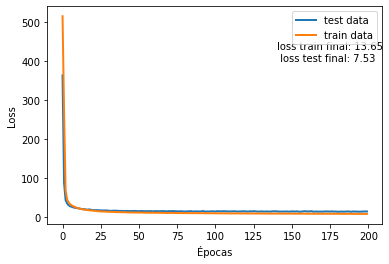

In [5]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
loss_final_ts = history.history['loss'][-1]
loss_final_tr = history.history['val_loss'][-1]
plt.text(140,400,'loss train final: '+str(round(loss_final_tr,2))+'\n loss test final: '+str(round(loss_final_ts,2)))
plt.savefig('ej1_loss.pdf')

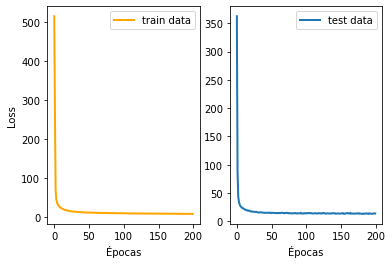

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.plot(history.history['val_loss'],label='test data',linewidth=2)
ax1.set_xlabel('Épocas')
ax2.set_xlabel('Épocas')
ax1.set_ylabel('Loss')
ax2.legend()
ax1.plot(history.history['loss'],label='train data',linewidth=2,c='orange')
ax1.legend()
fig.savefig('ej1_loss_1.pdf')

Text(30.25, 0.5, 'Valor real')

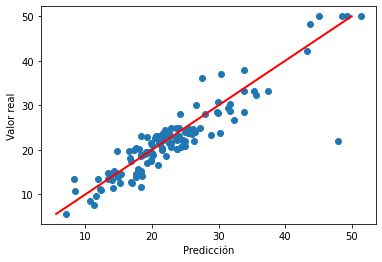

In [7]:
y_pr = model.predict(x_test)
plt.scatter(y_pr,y_test)
x_aux = np.linspace(min(y_test),max(y_test),100)
plt.plot(x_aux,x_aux,c='r',linewidth=2)
plt.savefig('ej1_comp.pdf')
plt.xlabel('Predicción')
plt.ylabel('Valor real')